ADDITIONAL MATERIAL   https://github.com/MathPhysSim/MARS_ROVER


In [17]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

from sublementary.Mars_Rover_env import MarsRoverEnv
from Solutions import policy_evaluation, mc_prediction, print_state_value_function, plot_value_function, rmse, td

gamma = 1

pi_history = []
vi_history = []

In [13]:
def plot_value_function_snapshots(title, V_track, episodes, V_true=None):
    """
    Plot the state–value estimates for a handful of episode indices side‑by‑side,
    optionally together with the true value function.

    Parameters
    ----------
    title : str
        Figure title.
    V_track : ndarray
        Array of shape (n_episodes, n_states) that stores the running
        state‑value estimates.
    episodes : Iterable[int]
        Episode indices (0‑based) to visualise, e.g. [0, 1, 10, 100].
    V_true : ndarray or None
        If provided, the true state‑value function will be overlaid.
    """
    episodes = [ep for ep in episodes if ep < V_track.shape[0]]
    plt.figure(figsize=(8, 4))
    for ep in episodes:
        plt.plot(V_track[ep], marker='o', label=f'Episode {ep}')
    if V_true is not None:
        plt.plot(V_true, linewidth=2, color='lime', label='True V')

    plt.axhline(y=5.5, color='black', linestyle='--')
    plt.xlim(1, 5)
    plt.ylim(1, 10)
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [14]:
SEEDS = (12, 34, 56, 78, 90)

[0.  2.5 4.  5.5 7.  8.5 0. ]


  0%|          | 0/100 [00:00<?, ?it/s]
                                       
  0%|          | 0/100 [00:00<?, ?it/s]
                                       
  0%|          | 0/100 [00:00<?, ?it/s]
                                       
  0%|          | 0/100 [00:00<?, ?it/s]
                                       
All seeds: 100%|██████████| 5/5 [00:00<00:00, 78.82it/s]

State-value function:
|           | 01  2.944 | 02  4.534 | 03  5.889 | 04  6.999 | 05  8.863 |           |


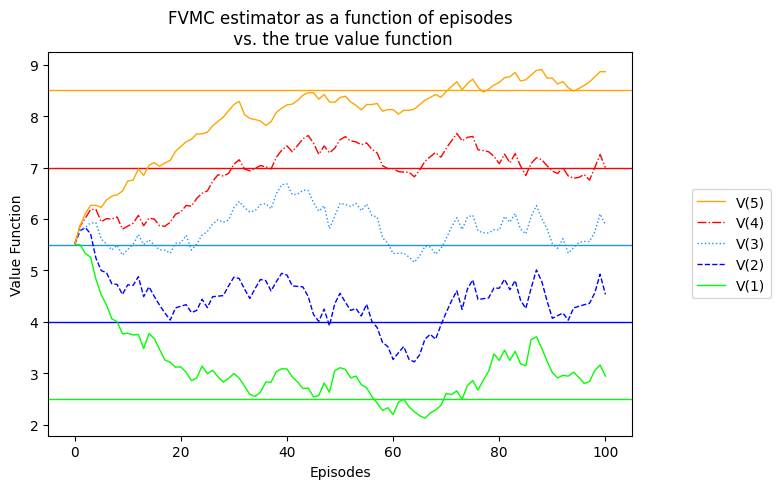

RMSE FVMC learning: 0.3307


  0%|          | 0/100 [00:00<?, ?it/s]
                                       
  0%|          | 0/100 [00:00<?, ?it/s]
                                       
  0%|          | 0/100 [00:00<?, ?it/s]
                                       
  0%|          | 0/100 [00:00<?, ?it/s]
                                       
All seeds: 100%|██████████| 5/5 [00:00<00:00, 94.98it/s]


State-value function:
|           | 01  2.471 | 02  4.206 | 03  5.945 | 04  7.336 | 05  8.893 |           |

State-value function errors:
|           | 01 -0.029 | 02  0.206 | 03  0.445 | 04  0.336 | 05  0.393 |           |
RMSE TD learning: 0.2694


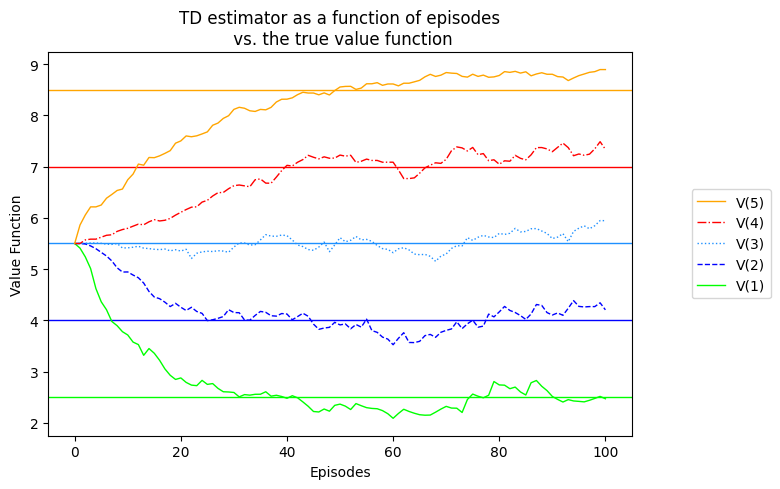

In [15]:
if __name__ == '__main__':

    env = MarsRoverEnv(n_states=5, p_backward=0.5, p_stay=0)

    LEFT, RIGHT = range(2)
    pi = lambda s: {
        0: LEFT, 1: LEFT, 2: LEFT, 3: LEFT, 4: LEFT, 5: LEFT, 6: LEFT
    }[s]

    # we use policy_evaluation here, are there alternatives?
    V_true = policy_evaluation(env, pi)[0]
    print(V_true)
    constant_alpha = 0.1

    V_init = 5.5
    init_state = env.reset()

    gamma = 1.0
    n_episodes = 100

    P = env.P

    V_fvmcs, V_track_fvmcs = [], []

    for seed in tqdm(SEEDS, desc='All seeds', leave=True):
        random.seed(seed);
        np.random.seed(seed);
        env.seed(seed)
        V_fvmc, V_track_fvmc, targets_fvmc = mc_prediction(pi, env, gamma=gamma, n_episodes=n_episodes,
                                                           constant_alpha=constant_alpha, init_V=V_init)
        V_fvmcs.append(V_fvmc);
        V_track_fvmcs.append(V_track_fvmc)
    V_fvmc, V_track_fvmc = np.mean(V_fvmcs, axis=0), np.mean(V_track_fvmcs, axis=0)

    print_state_value_function(V_fvmc, P, n_cols=7)
    plot_value_function('FVMC estimator as a function of episodes\n vs. the true value function',
                        V_track_fvmc, V_true, log=False)
    print('RMSE FVMC learning:', rmse(V_fvmc, V_true))

    V_tds, V_track_tds = [], []
    for seed in tqdm(SEEDS, desc='All seeds', leave=True):
        random.seed(seed);
        np.random.seed(seed);
        env.seed(seed)

        V_td, V_track_td, targets_td = td(pi, env, gamma=gamma, n_episodes=n_episodes, constant_alpha=constant_alpha,
                                          init_V=V_init)
        V_tds.append(V_td);
        V_track_tds.append(V_track_td)

    V_td, V_track_td = np.mean(V_tds, axis=0), np.mean(V_track_tds, axis=0)

    print_state_value_function(V_td, P, n_cols=7)
    print()
    print_state_value_function(V_td - V_true, P, n_cols=7, title='State-value function errors:')
    print('RMSE TD learning:', rmse(V_td, V_true))

    plot_value_function('TD estimator as a function of episodes\n vs. the true value function', V_track_td, V_true,
                        log=False)


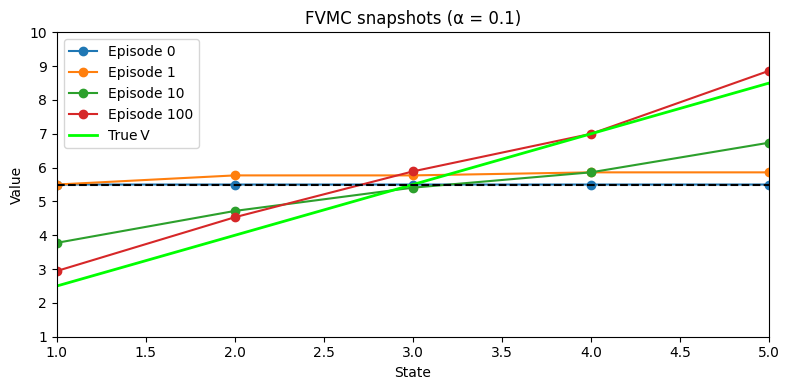

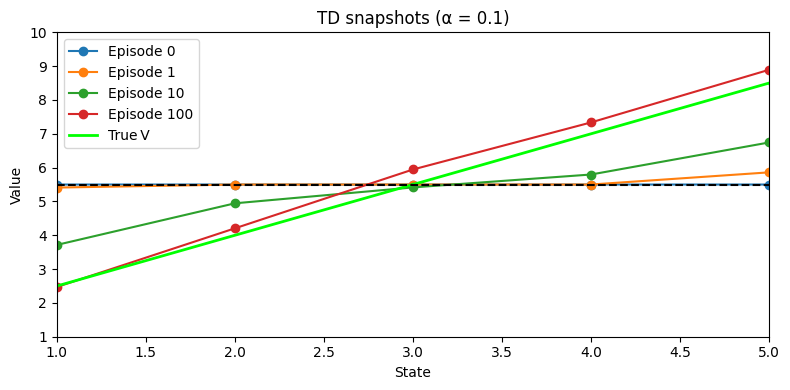

In [16]:
    # --- Snapshot plots ----------------------------------------------------
    snapshot_eps = [0, 1, 10, 100]
    plot_value_function_snapshots(
        'FVMC snapshots (α = 0.1)',
        V_track_fvmc,
        snapshot_eps,
        V_true
    )
    plot_value_function_snapshots(
        'TD snapshots (α = 0.1)',
        V_track_td,
        snapshot_eps,
        V_true
    )